# The Lending Club

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn as sk

## Read the Data

In [2]:
loansData = pd.read_csv('https://spark-public.s3.amazonaws.com/dataanalysis/loansData.csv')
loansData.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
81174,20000,20000,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2,< 1 year
99592,19200,19200,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1,2 years
80059,35000,35000,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14,21977,1,2 years
15825,10000,9975,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10,9346,0,5 years
33182,12000,12000,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11,14469,0,9 years


## Understanding the Data

<b>Amount.Requested</b>: The amount (in dollars) requested in the loan application.<br>
<b>Amount.Funded.By.Investors</b>: The amount (in dollars) loaned to the individual.<br>
<b>Interest.rate</b>: The lending interest rate charged to the borrower.<br>
<b>Loan.length</b>: The length of time (in months) of the loan.<br>
<b>Loan.Purpose</b>: The purpose of the loan as stated by the applicant.<br>
<b>Debt.to.Income.Ratio</b>: The % of consumer’s gross income going toward paying debts.<br>
<b>State</b>: The abbreviation for the U.S. state of residence of the loan applicant.<br>
<b>Home.ownership</b>: Indicates whether the applicant owns, rents, or has a mortgage.<br>
<b>Monthly.income</b>: The monthly income of the applicant (in dollars).<br>
<b>FICO.range</b>: A range indicating the applicants FICO score.<br>
<b>Open.CREDIT.Lines</b>: The number of open lines of credit at the time of application.<br>
<b>Revolving.CREDIT.Balance</b>: The total amount outstanding all lines of credit.<br>
<b>Inquiries.in.the.Last.6.Months</b>: Number of credit inquiries in the previous 6 months.<br>
<b>Employment.Length</b>: Length of time employed at current job.<br>

## Handling Missing Data

In [3]:
loansData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 81174 to 3116
Data columns (total 14 columns):
Amount.Requested                  2500 non-null int64
Amount.Funded.By.Investors        2500 non-null float64
Interest.Rate                     2500 non-null object
Loan.Length                       2500 non-null object
Loan.Purpose                      2500 non-null object
Debt.To.Income.Ratio              2500 non-null object
State                             2500 non-null object
Home.Ownership                    2500 non-null object
Monthly.Income                    2499 non-null float64
FICO.Range                        2500 non-null object
Open.CREDIT.Lines                 2498 non-null float64
Revolving.CREDIT.Balance          2498 non-null float64
Inquiries.in.the.Last.6.Months    2498 non-null float64
Employment.Length                 2500 non-null object
dtypes: float64(5), int64(1), object(8)

In [4]:
loansData = loansData.dropna()
loansData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2498 entries, 81174 to 3116
Data columns (total 14 columns):
Amount.Requested                  2498 non-null int64
Amount.Funded.By.Investors        2498 non-null float64
Interest.Rate                     2498 non-null object
Loan.Length                       2498 non-null object
Loan.Purpose                      2498 non-null object
Debt.To.Income.Ratio              2498 non-null object
State                             2498 non-null object
Home.Ownership                    2498 non-null object
Monthly.Income                    2498 non-null float64
FICO.Range                        2498 non-null object
Open.CREDIT.Lines                 2498 non-null float64
Revolving.CREDIT.Balance          2498 non-null float64
Inquiries.in.the.Last.6.Months    2498 non-null float64
Employment.Length                 2498 non-null object
dtypes: float64(5), int64(1), object(8)

## Handling Non-numeric Data

In [5]:
loansData.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
81174,20000,20000,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14,14272,2,< 1 year
99592,19200,19200,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12,11140,1,2 years
80059,35000,35000,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14,21977,1,2 years
15825,10000,9975,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10,9346,0,5 years
33182,12000,12000,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11,14469,0,9 years


In [6]:
def check_for_percent(x):
    if x.find('%') != -1:
        x = x[:-1]
    return float(x)

In [7]:
loansData['Interest.Rate'] = loansData['Interest.Rate'].apply(lambda x: float(x[:4]))
loansData['Debt.To.Income.Ratio'] = loansData['Debt.To.Income.Ratio'].apply(lambda x: x[:4])
loansData['Loan.Length'] = loansData['Loan.Length'].apply(lambda x:int(x[:2]))
loansData['Debt.To.Income.Ratio'] = loansData['Debt.To.Income.Ratio'].apply(lambda x: check_for_percent(x))

## Exploratory Data Analysis

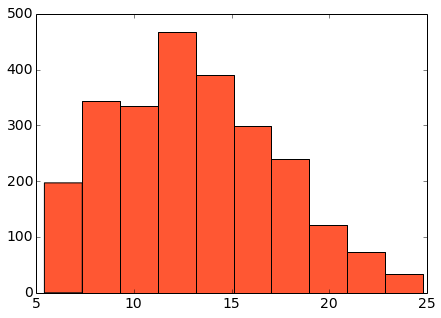

In [8]:
plt.rcParams['figure.figsize'] = (7, 5)
plt.rcParams['font.size'] = 14
plot  = plt.hist(loansData['Interest.Rate'].values, bins=10,color='#FF5733')

## Handling Non-numeric Data

Most of basic machine learning techniques does not work on strings. The sklearn package we use in this notebook does not deal with pandas dataframes and require numpy arrays.
In order to achieve that we can get rid of the unnecessary attributes and reform the needed ones in numbers.

### The State's Effect on the Interest Rate

Check the number of unique states.

In [9]:
loansData['State'].nunique()

46

Visualize the average interest rate in each state

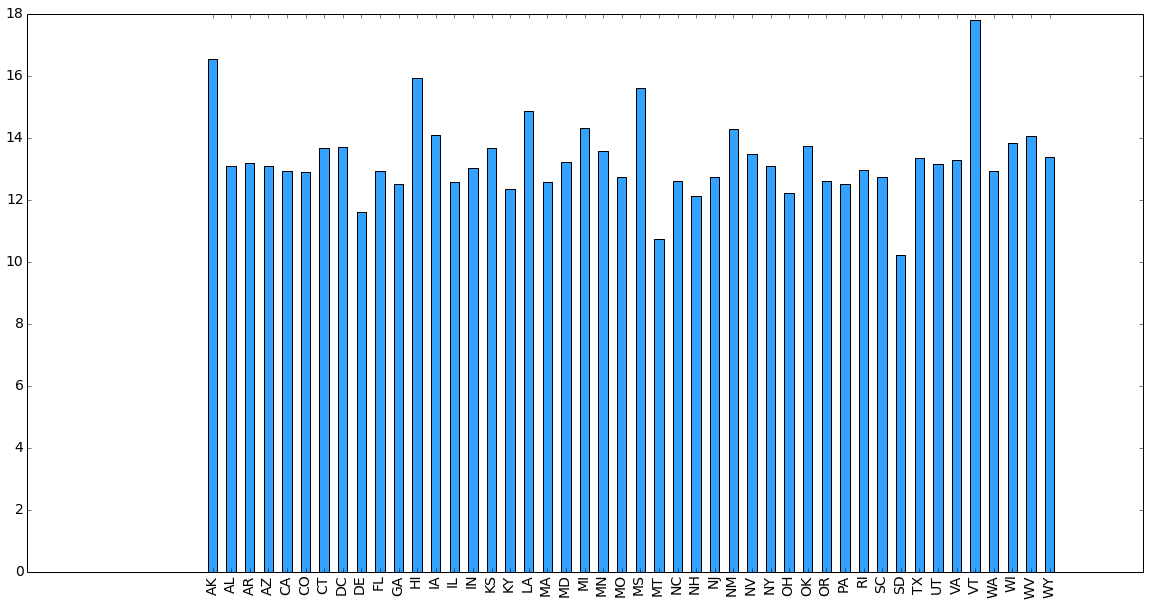

In [10]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 14

state_interest = loansData[['Interest.Rate','State']].groupby('State').mean()

state_interest  = state_interest['Interest.Rate']
state_interest_data = state_interest.tolist()
labels = state_interest.keys().get_values()

plt.bar(list(xrange(len(state_interest_data))),state_interest_data,0.5, color='#33A2FF', align='center')
ticks = plt.xticks(list(xrange(len(state_interest_data))), labels,rotation='vertical')

We can obsereve that nearly all states have an average interest rate between 13 and 15 so I guess the state is not affecting the interest rate that much.

In [11]:
loansData = loansData.drop('State',axis=1)

### The Effect of Loan Purpose

We have 14 different loan purpose

In [12]:
loansData['Loan.Purpose'].nunique()

14

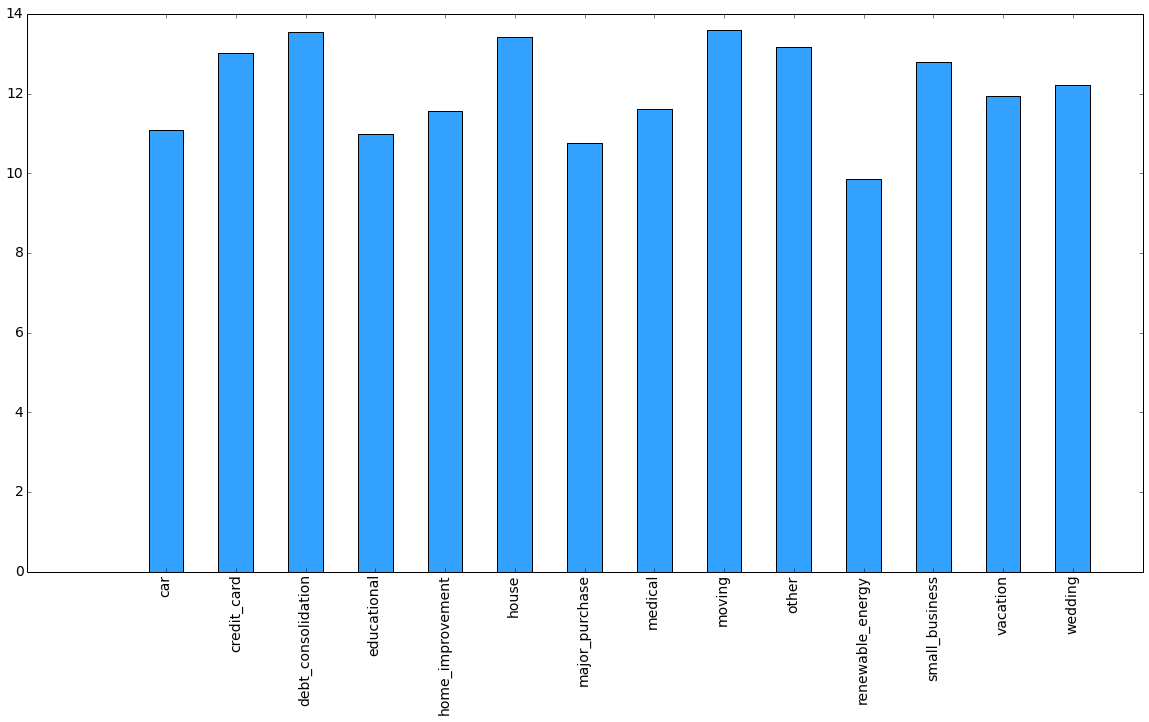

In [13]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 14

loan_purpose_interest = loansData[['Interest.Rate','Loan.Purpose']].groupby('Loan.Purpose').mean()

loan_purpose_interest  = loan_purpose_interest['Interest.Rate']
loan_purpose_interest_data = loan_purpose_interest.tolist()
loan_labels = loan_purpose_interest.keys().get_values()

plt.bar(list(xrange(len(loan_purpose_interest_data))),loan_purpose_interest_data,0.5, color='#33A2FF', align='center')
ticks = plt.xticks(list(xrange(len(loan_purpose_interest_data))), loan_labels,rotation='vertical')

We can obsereve that the average interest rate for each purpose doesn't change so much

In [14]:
loansData = loansData.drop('Loan.Purpose',axis=1)

In [15]:
loansData = loansData.drop('Employment.Length',axis=1)

### The Effect of Home Ownership

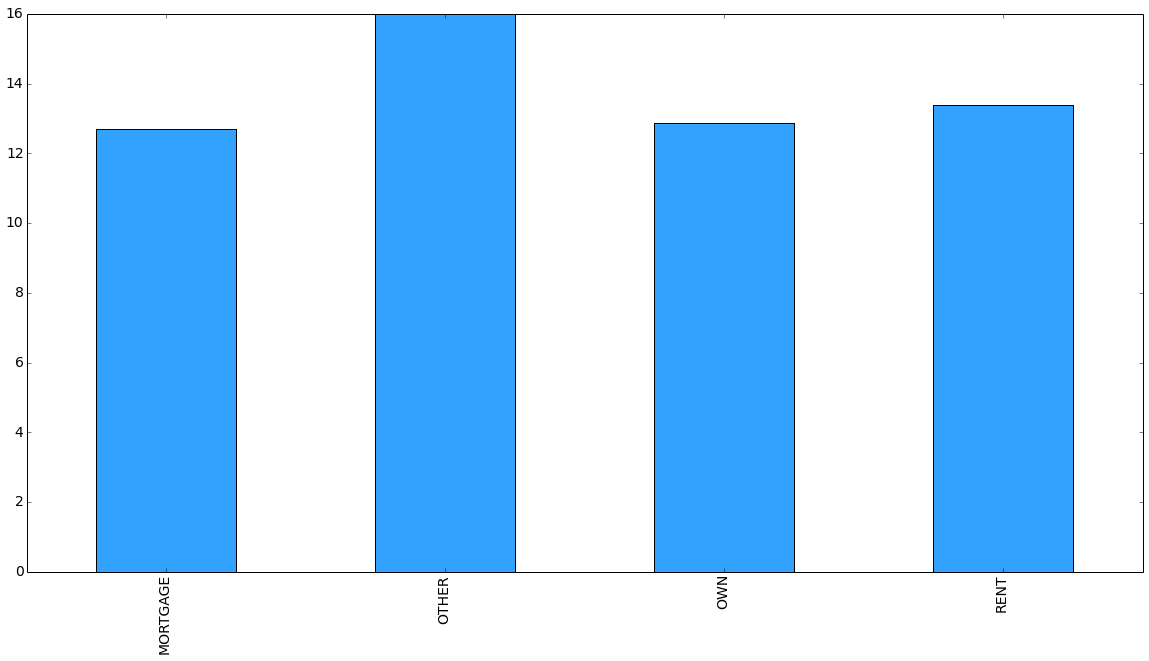

In [16]:
loansData[['Interest.Rate','Home.Ownership']].groupby('Home.Ownership').mean()

plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['font.size'] = 14

home_ownership_interest = loansData[['Interest.Rate','Home.Ownership']].groupby('Home.Ownership').mean()

home_ownership_interest  = home_ownership_interest['Interest.Rate']
home_ownership_interest_data = home_ownership_interest.tolist()
home_ownership_labels = home_ownership_interest.keys().get_values()

plt.bar(list(xrange(len(home_ownership_interest_data))),home_ownership_interest_data,0.5, color='#33A2FF', align='center')
ticks = plt.xticks(list(xrange(len(home_ownership_interest_data))), home_ownership_labels,rotation='vertical')

The home ownership doesn't affect too much.

In [17]:
loansData = loansData.drop('Home.Ownership',axis=1)

### Handling The FICO Range

We have two choices either having a mid point at each range or capturing the minimum and the maximum.

In [18]:
loansData['FICO.Min'] = loansData['FICO.Range'].apply(lambda x: int(x[:3]))
loansData['FICO.Max'] = loansData['FICO.Range'].apply(lambda x: int(x[-3:]))
loansData['FICO.Mid'] = (loansData['FICO.Min'] + loansData['FICO.Max'])/2.0
loansData = loansData.drop('FICO.Range',axis=1)

### The Effect of Loan Length

In [19]:
loansData[['Interest.Rate','Loan.Length']].groupby('Loan.Length').mean()

,Interest.Rate
Loan.Length,
36,12.099164
60,16.356551


## Visualizing the Scatter Matrix

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


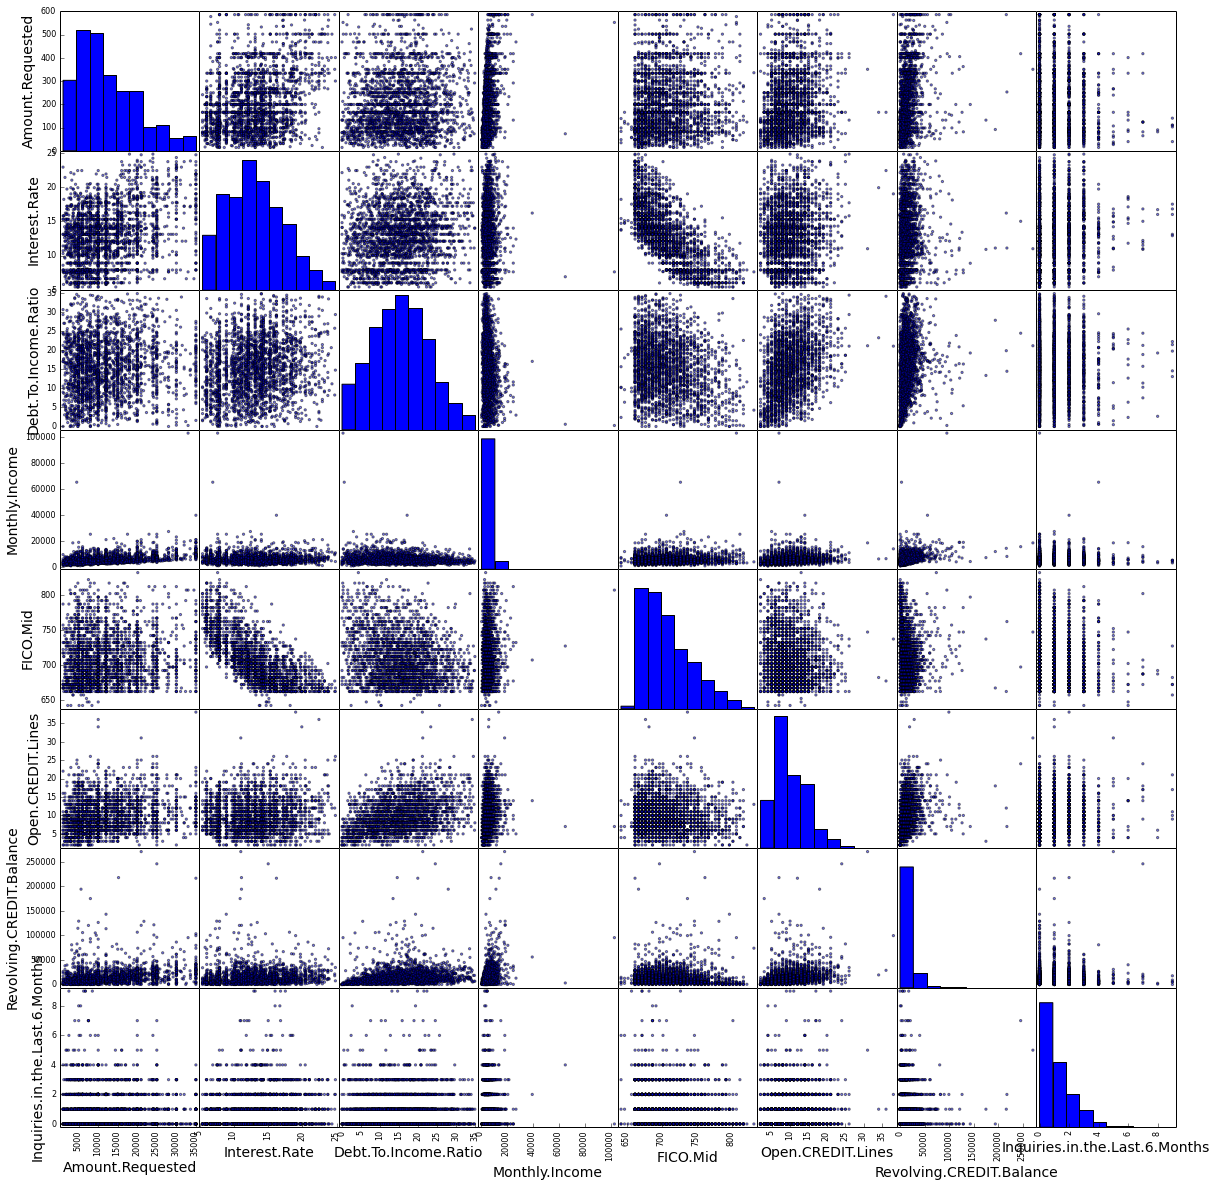

In [20]:
plt.rcParams['figure.figsize'] = (20, 20)
plt.rcParams['font.size'] = 14
plot  = pd.scatter_matrix(loansData[['Amount.Requested','Interest.Rate','Debt.To.Income.Ratio','Monthly.Income',
                                   'FICO.Mid', 'Open.CREDIT.Lines' ,'Revolving.CREDIT.Balance',
                                     'Inquiries.in.the.Last.6.Months']])

## Handling Outliers

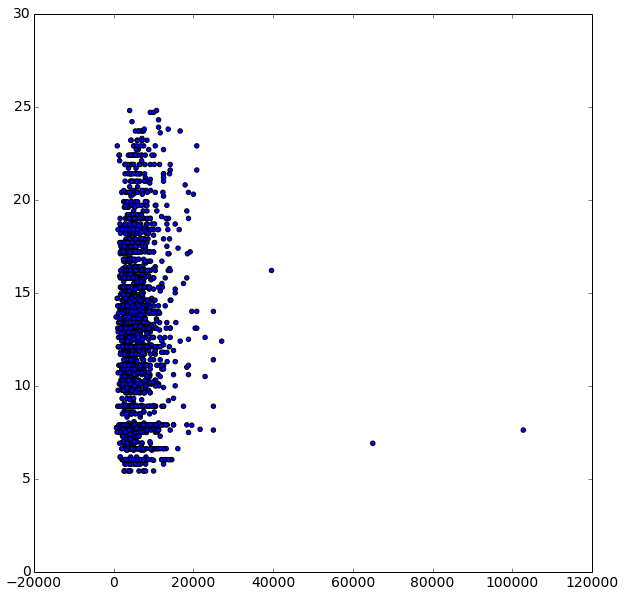

In [21]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['font.size'] = 14
plt.scatter(loansData['Monthly.Income'].values,loansData['Interest.Rate'].values)

In [22]:
loansData = loansData[loansData['Monthly.Income'] <=39000]

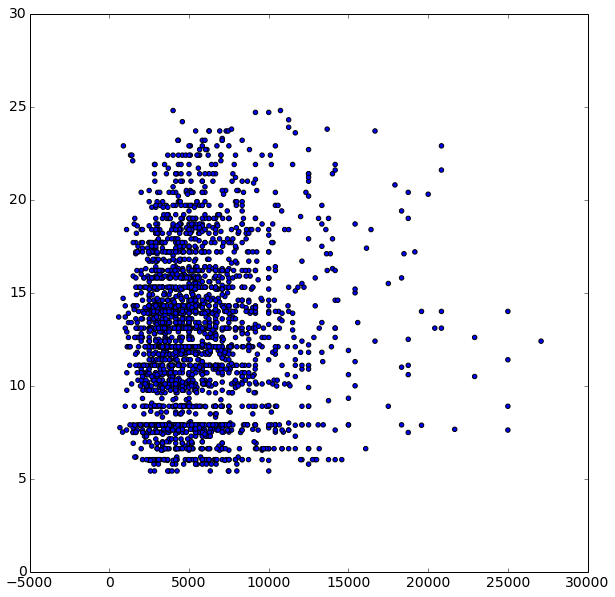

In [23]:
plt.scatter(loansData['Monthly.Income'].values,loansData['Interest.Rate'].values)

## Linear Regression

In [24]:
loansData.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,FICO.Min,FICO.Max,FICO.Mid
81174,20000,20000,8.90,36,14.9,6541.67,14,14272,2,735,739,737
99592,19200,19200,12.10,36,28.3,4583.33,12,11140,1,715,719,717
80059,35000,35000,21.90,60,23.8,11500.00,14,21977,1,690,694,692
15825,10000,9975,9.99,36,14.3,3833.33,10,9346,0,695,699,697
33182,12000,12000,11.70,36,18.7,3195.00,11,14469,0,695,699,697


In [27]:
from sklearn import cross_validation
targets = loansData['Interest.Rate'].values
data = loansData.drop('Interest.Rate',axis=1).values
train_data, test_data, train_targets, test_targets =cross_validation.train_test_split(data, targets, test_size=0.2, random_state=0)

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model = model.fit(train_data,train_targets)
prediction1 = model.predict(test_data)

In [29]:
from sklearn.metrics import mean_squared_error
mean_squared_error(prediction1, test_targets)

4.3201285567720626

## Add preprocessing

In [32]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
normalized_data = min_max_scaler.fit_transform(data)
normalized_labels = min_max_scaler.fit_transform(targets)

normalized_train_data, normalized_test_data, normalized_train_targets, normalized_test_targets =cross_validation.train_test_split(normalized_data, normalized_labels, test_size=0.2, random_state=0)

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [35]:
from sklearn.linear_model import LinearRegression
model_preprocessing = LinearRegression()
model_preprocessing = model_preprocessing.fit(normalized_train_data,normalized_train_targets)
prediction2 = model_preprocessing.predict(normalized_test_data)

In [36]:
from sklearn.metrics import mean_squared_error
mean_squared_error(prediction2, normalized_test_targets)

0.011610429225401389

## Selecting Features

In [37]:
from sklearn import cross_validation
labels2 = loansData['Interest.Rate'].values
data2 = loansData[['Amount.Requested','Loan.Length','Monthly.Income','Open.CREDIT.Lines','FICO.Mid']]
train_data2, test_data2, train_labels2, test_labels2 =cross_validation.train_test_split(data2, labels2, test_size=0.2, random_state=0)

In [38]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2 = model2.fit(train_data2,train_labels2)
pre2 = model2.predict(test_data2)
pre2.mean()

13.084617434287994

In [39]:
mean_squared_error(pre2, test_labels2)


4.615513907903031

## KNN

In [41]:
from sklearn.neighbors import KNeighborsRegressor
model3 = KNeighborsRegressor(n_neighbors=5)
model3 = model3.fit(train_data,train_targets)
pre3 = model3.predict(test_data)

In [42]:
mean_squared_error(pre3, test_targets)


18.174030356713427

## Decision Tree

In [44]:
from sklearn.tree import DecisionTreeRegressor
model4  = DecisionTreeRegressor(max_depth=8)
model4 = model4.fit(train_data,train_targets)
pre4 = model4.predict(test_data)
pre4.mean()

12.986016972185979

In [45]:
mean_squared_error(pre4,test_targets)

5.694033925089891